In [1]:
# What is jupyter?
# Well, it's this. It's a shell for executable "notebooks". You'll see as we go through this that we're
# running actual examples. It's using python behind the scenes to run each cell and get an output. For example,
# we can run a simple python math problem and get a result

1 + 5 * 2

11

In [2]:
# What is pandas?

# Pandas is a general purpose library of data tools for loading, saving, manipulating, querying, etc. data sets.
# It introduces two data structures: Series and DataFrames, of which the DataFrame is both the most useful and most interesting

# What is a DataFrame?
# It is a data structure that organizes data into columns and rows, much like an excel spreadsheet. You can perform operations on a single column, single row, or a combination of a column and row that would target a single cell.
# This method of structuring data is familiar to data scientists and can feel foreign to developers.

import pandas as pd

# don't worry, we'll describe this in more detail later
import numpy as np

In [3]:
# Let's start with a simple dataframe
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

# This doesn't create an object with 1 row, but actually a DataFrame with 4 rows. Can you spot how that's happening?
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [4]:
# We can access rows
df[0:2]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [5]:
# We can access a single column
df["A"]

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [6]:
# We can apply filters
df.loc[df["E"] == "test"]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [7]:
# We can calculate values
df["D"].mean()

3.0

In [8]:
# We can import data sets of varying types
temps = pd.read_csv("work/climdiv_state_year.csv")

In [9]:
# Pandas is a library that allows you to slice and dice data in multiple ways, and it is a powerful tool
# that speaks data scientists' language.

# Another powerful library that performs maths on a set up numbers is numpy. You can think of it as Python's
# advanced Math library. We imported it earlier and used its basic data structure within pandas. Pandas and numpy
# actually work together quite often, with the mean we calculated above being handled by pandas.

In [10]:
temps["year"].min()

1895

In [11]:
temps["year"].max()

2019

In [12]:
temps["year"].mean()

1957.0

In [13]:
temps["year"].to_numpy().mean()

1957.0

In [14]:
temps["year"].to_numpy().max()

2019

In [15]:
# Colorado is fips 8
temps[temps["fips"] == 8]["tempc"].mean()

7.130925925925922

In [16]:
# Illinois is fips 17
temps[temps["fips"] == 17]["tempc"].mean()

10.990962962962964

In [17]:
# Numpy can calculate lots of things, like the 5th percentile tempc of Colorado
np.percentile(temps[temps["fips"] == 8]["tempc"], 5)

6.015740740740739

In [18]:
# or the 95th percentile tempc of Colorado
np.percentile(temps[temps["fips"] == 8]["tempc"], 95)

8.414814814814813

In [19]:
# or both
np.percentile(temps[temps["fips"] == 8]["tempc"], [5, 95])

array([6.01574074, 8.41481481])

In [20]:
# Finally, we might actually want to show some visuals. There's a number of libraries out there, but we
# wanted to show you seaborn

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

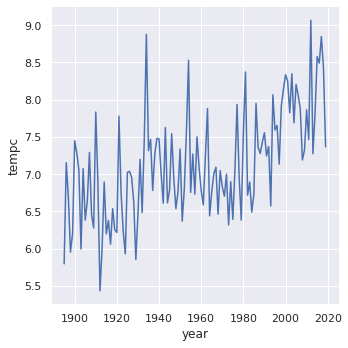

In [24]:
# let's visualize Colorado temperature data
sns.relplot(data=temps[temps["fips"] == 8], kind="line", y="tempc", x="year")

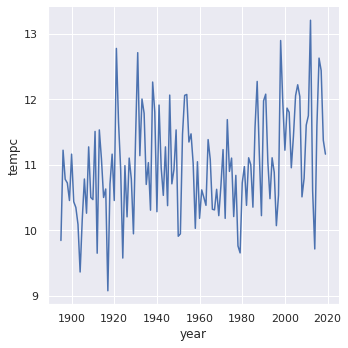

In [23]:
# and Illinois temperature data
sns.relplot(data=temps[temps["fips"] == 17], kind="line", y="tempc", x="year")

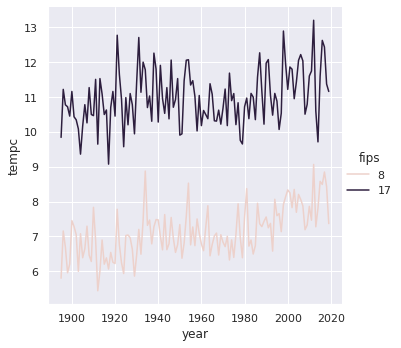

In [33]:
# and let's put them together
sns.relplot(data=temps[temps["fips"].isin([8, 17])], kind="line", y="tempc", x="year", hue="fips")

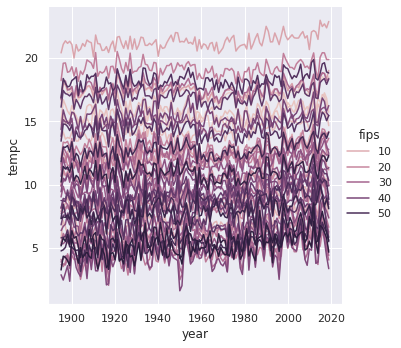

In [35]:
# all states are too messy

sns.relplot(data=temps, kind="line", y="tempc", x="year", hue="fips")

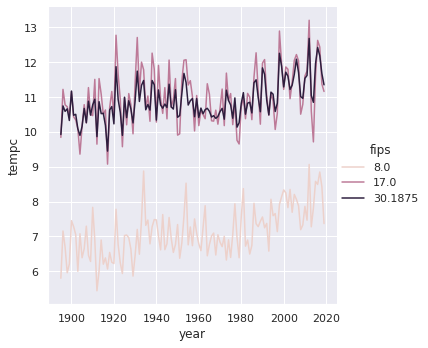

In [47]:
# but maybe a national average will help

sns.relplot(data=pd.concat([temps[temps["fips"].isin([8, 17])], temps.groupby('year', as_index=False).mean()]), kind="line", y="tempc", x="year", hue="fips")

In [48]:
# And here we can see something interesting. Illinois closely tracks the national average, going into
# the extremes of both hotter and colder than the national average. Colorado is consistently colder than
# national average